In [32]:
%matplotlib inline 
import matplotlib.pylab
import pandas as pd
import numpy as np

# Pandas data frames make data easy to see, references, and manipulate

very much copied from
http://pandas.pydata.org/pandas-docs/stable/10min.html

### You can create a data frame with a dictionary of lists

In [33]:
students = pd.DataFrame({'phone': ['555-1212', '555-1234', '555-1111', '555-2222'], 'age':[17, 17, 18, 18]}, index = ['Melanie', 'Bob', 'Vidhya', 'Ming'])
students

,age,phone
Melanie,17,555-1212
Bob,17,555-1234
Vidhya,18,555-1111
Ming,18,555-2222


In [34]:
students.index

Index(['Melanie', 'Bob', 'Vidhya', 'Ming'], dtype='object')

### You can also create a data frame with a numpy array and some column names

In [35]:
df = pd.DataFrame(np.random.randn(6,4), index=['Jenny', 'Frank', 'Wenfei', 'Arun', 'Mary', 'Ivan'], columns=list('ABCD'))
df

,A,B,C,D
Jenny,-0.432153,-0.649571,0.225869,0.218239
Frank,0.171284,-1.786769,1.493990,-0.942647
Wenfei,0.754607,-1.521254,-0.937062,0.856349
Arun,1.987536,2.014661,0.132679,-0.904426
Mary,0.496174,-1.043159,-1.247791,-2.804066
Ivan,0.322135,-1.376274,1.191140,0.446982


### There are also Series, which gets you all the functionality of a data frame when you have a 1-dimensional set of data with an index

In [36]:
s = pd.Series([1,3,5,np.nan,6,8])

In [37]:
s.index = ['a', 'b', 'c', 'd', 'e', 'f']
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [38]:
s.isnull()

a    False
b    False
c    False
d     True
e    False
f    False
dtype: bool

### Dataframes and series play nice with plotting

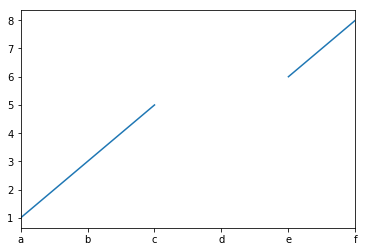

In [39]:
s.plot()

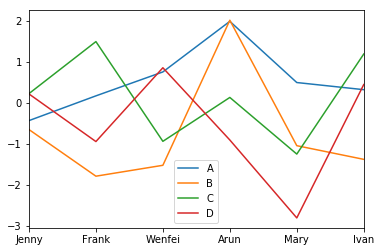

In [40]:
df.plot()

### Once you have a data frame, it's easy to see portions of your data that match what you want (same goes for series)

In [41]:
s[s.index > 'c']

d    NaN
e    6.0
f    8.0
dtype: float64

In [42]:
s[s.isnull() == False]

a    1.0
b    3.0
c    5.0
e    6.0
f    8.0
dtype: float64

In [43]:
students['age']

Melanie    17
Bob        17
Vidhya     18
Ming       18
Name: age, dtype: int64

In [44]:
students.age

Melanie    17
Bob        17
Vidhya     18
Ming       18
Name: age, dtype: int64

In [45]:
# 'selection by label'
students.loc['Melanie']

age            17
phone    555-1212
Name: Melanie, dtype: object

In [46]:
students.loc['Melanie', ['age', 'grades']]

age        17
grades    NaN
Name: Melanie, dtype: object

In [47]:
# select by position
students.iloc[1, :]

age            17
phone    555-1234
Name: Bob, dtype: object

In [48]:
students.ix[1, :2]

age            17
phone    555-1234
Name: Bob, dtype: object

In [49]:
students[students['age'] > 17]

,age,phone
Vidhya,18,555-1111
Ming,18,555-2222


### It's also easy to summarize your data

In [50]:
students.age.mean()

17.5

In [51]:
students.age.max()

18

In [52]:
students.age.min()

17

### You can add information to an existing data frame

In [53]:
students['grades'] = [100, 97, 80, 85]

In [54]:
students[students['grades'] == students['grades'].max()]

,age,phone,grades
Melanie,17,555-1212,100


### You can also easily aggregate information

In [55]:
students.groupby('age').grades.mean()

age
17    98.5
18    82.5
Name: grades, dtype: float64

### You can even create categories to aggregate with on-the-fly

In [56]:
bins = np.linspace(70, 100, 3)
bins
students.groupby(np.digitize(students.grades, bins)).age.mean()

1    18.0
2    17.5
3    17.0
Name: age, dtype: float64

### Finally applying functions is also quite straight-forward

In [57]:
# First let's see what a lambda function looks like / does
f = lambda x: x + 1

In [58]:
f(4)

5

In [59]:
students.age.apply(lambda age: age + 1)

Melanie    18
Bob        18
Vidhya     19
Ming       19
Name: age, dtype: int64

### Let's take a look at some built methods we might want to apply

In [60]:
students.age.mean()

17.5

In [61]:
students.age.count()

4

In [62]:
students.corr()

,age,grades
age,1.000000,-0.968364
grades,-0.968364,1.000000


In [63]:
students.cummax()

,age,phone,grades
Melanie,17,555-1212,100
Bob,17,555-1234,100
Vidhya,18,555-1234,100
Ming,18,555-2222,100
